<a href="https://colab.research.google.com/github/im-ankitjaiswal/atliq_hospitality_eda/blob/main/Atliq_Hospitality_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h2 align="center">AtliQ Hotels Data Analysis Project<h2>**

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

In [126]:
import pandas as pd

In [127]:
df_bookings = pd.read_csv("/content/fact_bookings.csv")
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [128]:
df_bookings.shape

(134590, 12)

In [129]:
# how many unique room category are there
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [130]:
# how many unique booking platforms are there
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [131]:
# no of platforms and their booking numbers
df_bookings.booking_platform.value_counts()

,count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


<Axes: xlabel='booking_platform'>

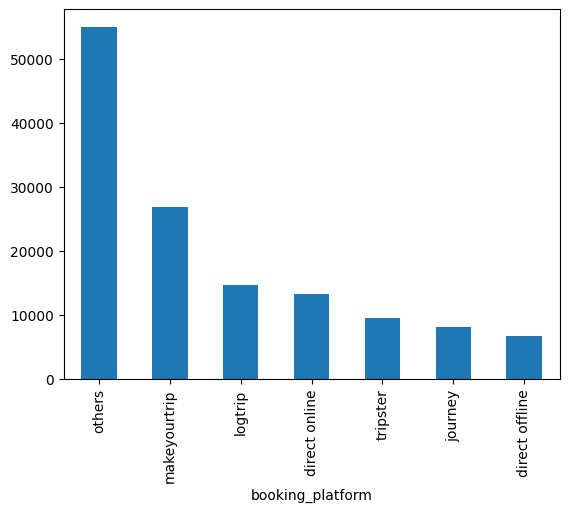

In [132]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [133]:
# basic stats automaticallyy for numeric column
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [172]:
df_date = pd.read_csv('/content/dim_date.csv')
df_hotels = pd.read_csv('/content/dim_hotels.csv')
df_rooms = pd.read_csv('/content/dim_rooms.csv')
df_agg_bookings = pd.read_csv('/content/fact_aggregated_bookings.csv')

In [165]:
df_hotels.shape

(25, 4)

<Axes: xlabel='city'>

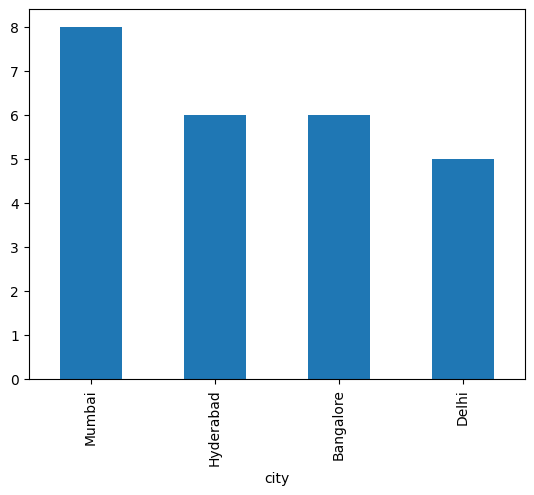

In [166]:
df_hotels.city.value_counts().plot(kind="bar")

***
**Exercise: Explore aggregate bookings**
***

**Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [173]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [174]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Exercise-2. Find out total bookings per property_id**

In [175]:
grouped_property = df_agg_bookings.groupby('property_id')
grouped_property['successful_bookings'].sum()

,successful_bookings
property_id,
16558,3153
16559,7338
16560,4693
16561,4418
16562,4820
16563,7211
17558,5053
17559,6142
17560,6013


**Exercise-3. Find out days on which bookings are greater than capacity**

In [176]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]['check_in_date']

,check_in_date
3,1-May-22
12,1-May-22
4136,11-Jun-22
6209,2-Jul-22
8522,25-Jul-22
9194,31-Jul-22


**Exercise-4. Find out properties that have highest capacity**

In [171]:
df_agg_bookings['capacity'].max()

***
### ==> 2. Data Cleaning
***

**(1) Clean invalid guests**

In [177]:
df_bookings[df_bookings.no_guests <= 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized



As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [178]:
# finding the data
df_bookings = df_bookings[df_bookings.no_guests > 0]
df_bookings.shape

(134573, 12)

**(2) Outlier removal in revenue generated**

In [179]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()
# we cannot have the 28560000 as revenue from single booking

(6500, 45220)

In [180]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(14915.959776478194, 13500.0)

In [181]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [182]:
higher_limit = avg + 3* std

revenue generated data cleaning

In [183]:
df_bookings[df_bookings.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,30-04-22,1/5/2022,2/5/2022,4.0,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,10/7/2022,31-07-22,6/8/2022,5.0,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [184]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(133054, 12)

In [185]:
df_bookings.revenue_realized.describe()

,revenue_realized
count,133054.000000
mean,12468.802749
std,6537.725429
min,2600.000000
25%,7600.000000
50%,11400.000000
75%,15300.000000
max,34200.000000


In [186]:
avg,std = df_bookings.revenue_realized.mean(),df_bookings.revenue_generated.std()

In [187]:
higher_limit = avg + 3*std
higher_limit

30383.018468530267

In [188]:
df_bookings[df_bookings.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
140,May012216559RT44,16559,28-04-22,1/5/2022,5/5/2022,2.0,RT4,others,NaN,Checked Out,32300,32300
141,May012216559RT45,16559,28-04-22,1/5/2022,4/5/2022,2.0,RT4,others,5.0,Checked Out,32300,32300
144,May012216559RT48,16559,26-04-22,1/5/2022,2/5/2022,2.0,RT4,makeyourtrip,5.0,Checked Out,32300,32300
145,May012216559RT49,16559,28-04-22,1/5/2022,3/5/2022,2.0,RT4,others,NaN,Checked Out,32300,32300
146,May012216559RT410,16559,30-04-22,1/5/2022,6/5/2022,2.0,RT4,logtrip,NaN,No Show,32300,32300
...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT41,17564,31-07-22,31-07-22,2/8/2022,1.0,RT4,direct online,NaN,Checked Out,32300,32300
134582,Jul312217564RT43,17564,31-07-22,31-07-22,3/8/2022,1.0,RT4,others,1.0,Checked Out,32300,32300
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [203]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

,revenue_realized
count,14552.000000
mean,22483.549203
std,8338.524462
min,7600.000000
25%,19000.000000
50%,22800.000000
75%,31350.000000
max,34200.000000


In [204]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [205]:
df_bookings.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77044
booking_status,0


Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)

In [206]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [207]:
df_agg_bookings.isnull().sum()

,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,0
occ_pct,0


In [208]:
# Check the statistics for the 'capacity' column
mean_capacity = df_agg_bookings['capacity'].mean()

In [209]:
# Decide on whether to use mean or median (I'll use median for this example)
df_agg_bookings['capacity'].fillna(mean_capacity, inplace=True)

<ipython-input-209-8e6d09a7383f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings['capacity'].fillna(mean_capacity, inplace=True)


In [210]:
# Verify that there are no more nulls
print(df_agg_bookings.isnull().sum())

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
occ_pct                0
dtype: int64


Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records

In [211]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [212]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
3,17558,1-May-22,RT1,30,19.0,157.89
12,16563,1-May-22,RT1,100,41.0,243.90
4136,19558,11-Jun-22,RT2,50,39.0,128.21
6209,19560,2-Jul-22,RT1,123,26.0,473.08
8522,19559,25-Jul-22,RT1,35,24.0,145.83
9194,18563,31-Jul-22,RT4,20,18.0,111.11


***
### ==> 3. Data Transformation
***

**Create occupancy percentage column**

In [213]:
df_agg_bookings['occ_pct'] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]

In [214]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [215]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x * 100, 2))

In [216]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [217]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   float64
 5   occ_pct              9200 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 431.4+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [218]:
# Group by 'room_category' and calculate the mean of 'occ_pct'
grouped_room_cat = df_agg_bookings.groupby('room_category')['occ_pct'].mean()

# View the result
print(grouped_room_cat)

room_category
RT1    58.232091
RT2    58.040278
RT3    58.028213
RT4    59.300461
Name: occ_pct, dtype: float64


I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [219]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [220]:
df = pd.merge(df_agg_bookings,df_rooms,left_on ="room_category",right_on ="room_id")
df.head(5)
df.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
3286,19560,2-Jun-22,RT4,8,16.0,50.00,RT4,Presidential
6939,18562,9-Jul-22,RT2,29,34.0,85.29,RT2,Elite
7783,18561,17-Jul-22,RT4,7,9.0,77.78,RT4,Presidential
8626,18563,26-Jul-22,RT2,12,29.0,41.38,RT2,Elite
1243,17562,13-May-22,RT2,15,30.0,50.00,RT2,Elite


In [221]:
# Group by 'room_category' and calculate the mean of 'occ_pct'
grouped_room_cat = df.groupby('room_class')['occ_pct'].mean().round(2)

# View the result
print(grouped_room_cat)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64


In [222]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


**2. Print average occupancy rate per city**

In [223]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [224]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


In [225]:
df = pd.merge(df_agg_bookings,df_hotels,on = "property_id")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,Atliq Palace,Business,Delhi
9196,16559,31-Jul-22,RT4,13,18.0,72.22,Atliq Exotica,Luxury,Mumbai
9197,17558,31-Jul-22,RT4,3,6.0,50.00,Atliq Grands,Luxury,Mumbai
9198,19563,31-Jul-22,RT4,3,6.0,50.00,Atliq Palace,Business,Bangalore


<Axes: xlabel='city'>

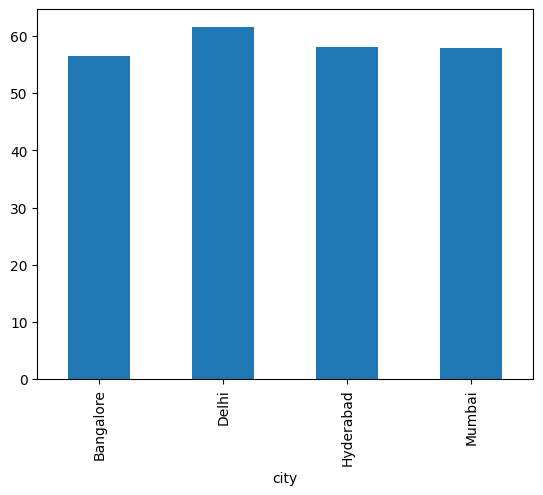

In [226]:
# Group by 'city' and calculate the mean of 'occ_pct', rounding to 2 decimal places
group_obj = df.groupby('city')['occ_pct'].mean().round(2)

# Plot the data as a bar chart
group_obj.plot(kind="bar")

**3. When was the occupancy better? Weekday or Weekend?**

In [227]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [228]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard


In [229]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,RT3,Premium,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,RT1,Standard,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,10-May-22,May 22,W 20,weekeday


In [230]:
df.groupby("day_type")["occ_pct"].mean().round(2)

,occ_pct
day_type,
weekeday,50.90
weekend,72.39


**4: In the month of June, what is the occupancy for different cities**

In [244]:
df_new = pd.merge( df_agg_bookings,df_hotels, on = "property_id",how="left")
df_new.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Atliq Palace,Business,Bangalore


In [250]:
df_merged = pd.merge(df_new,df_date,left_on ="check_in_date",right_on="date")
df_merged

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,16563,31-Jul-22,RT4,13,18.0,72.22,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend
6496,16559,31-Jul-22,RT4,13,18.0,72.22,Atliq Exotica,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6497,17558,31-Jul-22,RT4,3,6.0,50.00,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6498,19563,31-Jul-22,RT4,3,6.0,50.00,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend


In [251]:
df_june_22 = df_merged[df_merged["mmm yy"] == "Jun 22"]
df_june_22.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [252]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

,occ_pct
city,
Delhi,62.47
Hyderabad,58.46
Mumbai,58.38
Bangalore,56.58


<Axes: xlabel='city'>

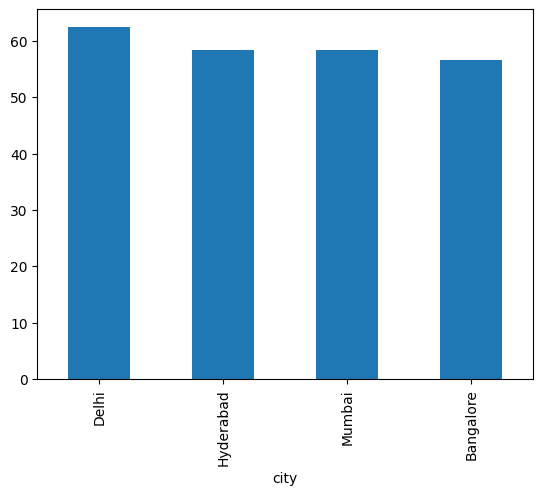

In [253]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

**5: We got new data for the month of august. Append that to existing data**

In [257]:
df_august = pd.read_csv("/content/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [258]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [259]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_id', 'room_class', 'date', 'mmm yy',
       'week no', 'day_type'],
      dtype='object')

In [260]:
df_august.shape

(7, 13)

**6. Print revenue realized per city**

In [261]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [262]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [263]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [264]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

,revenue_realized
city,
Bangalore,415109340
Delhi,289377088
Hyderabad,325179310
Mumbai,629358343


**7. Print month by month revenue**

In [265]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [266]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [267]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [268]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [269]:
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.head(5)

<ipython-input-269-bd3192f0a6b2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date'] = pd.to_datetime(df_date['date'])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [270]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133054 entries, 0 to 133053
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         133054 non-null  object 
 1   property_id        133054 non-null  int64  
 2   booking_date       133054 non-null  object 
 3   check_in_date      133054 non-null  object 
 4   checkout_date      133054 non-null  object 
 5   no_guests          133054 non-null  float64
 6   room_category      133054 non-null  object 
 7   booking_platform   133054 non-null  object 
 8   ratings_given      56010 non-null   float64
 9   booking_status     133054 non-null  object 
 10  revenue_generated  133054 non-null  int64  
 11  revenue_realized   133054 non-null  int64  
 12  property_name      133054 non-null  object 
 13  category           133054 non-null  object 
 14  city               133054 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [274]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], dayfirst=True, errors='coerce')
df_bookings_all.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [276]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [277]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

,revenue_realized
mmm yy,
Jul 22,236549400
Jun 22,222800908
May 22,227500149


**Exercise-1. Print revenue realized per hotel type**

In [278]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [279]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [283]:
df_bookings_all_hotel = pd.merge(df_bookings, df_hotels, on="property_id",how="left")
df_bookings_all_hotel.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [286]:
revenue_hotel_type = df_bookings_all_hotel.groupby('property_name')['revenue_realized'].sum()
print(revenue_hotel_type)

property_name
Atliq Bay        255681030
Atliq Blu        256639660
Atliq City       279540713
Atliq Exotica    302809064
Atliq Grands     207730078
Atliq Palace     294193161
Atliq Seasons     62430375
Name: revenue_realized, dtype: int64


**Exercise-2 Print average rating per city**

In [292]:
df_bookings_all_rating = pd.merge(df_bookings, df_hotels, on="property_id",how="left")
df_bookings_all_rating.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [297]:
avg_rating = df_bookings_all_rating.groupby('city')['ratings_given'].mean().round(2)
print(avg_rating)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64


**Exercise-3 Print a pie chart of revenue realized per booking platform**

In [301]:
rev_by_platform = df_bookings_all_rating.groupby('booking_platform')['revenue_realized'].mean().round(2)
print(rev_by_platform)

booking_platform
direct offline    12559.67
direct online     12404.33
journey           12457.88
logtrip           12486.74
makeyourtrip      12437.35
others            12472.86
tripster          12541.00
Name: revenue_realized, dtype: float64


<Axes: ylabel='revenue_realized'>

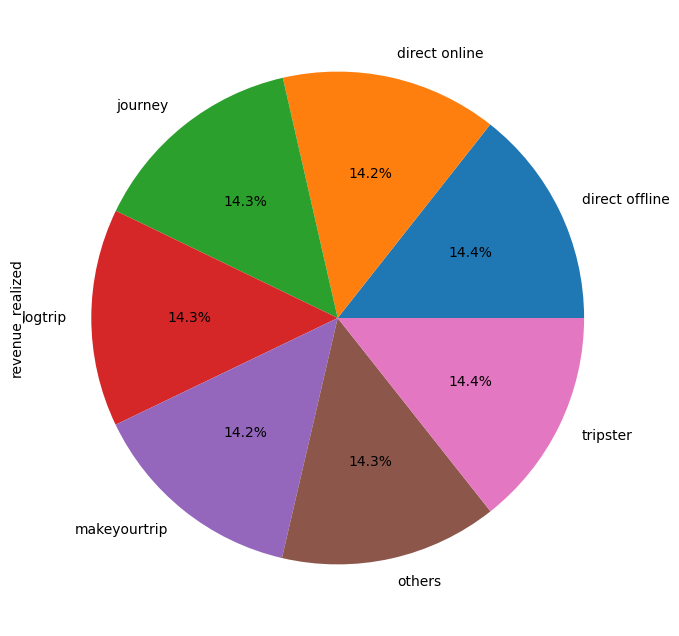

In [302]:
# Assuming rev_by_platform is a Series with revenue data indexed by platform names
rev_by_platform.plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8))
